# 导入数据

In [1]:
import pandas as pd

In [2]:
ls

data1.csv  data2.csv  merge.ipynb


## DtypeWarning

In [3]:
df1 = pd.read_csv('data1.csv')

/root/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df1

,tradeDate,secID,ROE,QuickRatio,PE,LFLO,TVMA20,REVS20,EP
0,2019/1/2,000009.XSHE,0.0104,0.8513,180.0405,22.9332,60.4605,0.8758,0.005554306
1,2019/1/2,000012.XSHE,0.0681,0.7034,19.5304,22.6784,20.2816,0.9149,0.051202228
2,2019/1/2,000021.XSHE,0.0877,0.8723,16.2858,22.8450,43.3856,0.9030,0.061403186
3,2019/1/2,000027.XSHE,0.0257,0.7900,37.1553,23.7396,20.7372,0.9555,0.026914061
4,2019/1/2,000028.XSHE,0.1240,1.3436,14.5830,23.2399,39.4524,0.8733,0.068572996
...,...,...,...,...,...,...,...,...,...
345781,2021/11/30,688029.XSHG,0.1139,3.7979,110.9337,23.1222,171.9601,1.0060,0.009014
345782,2021/11/30,688088.XSHG,0.0613,7.4023,120.9688,23.2944,237.6361,1.2744,0.008267
345783,2021/11/30,688099.XSHG,0.2108,3.2560,79.0363,23.9739,321.6632,1.1177,0.012652
345784,2021/11/30,688208.XSHG,0.1830,1.4225,74.1014,23.7365,172.6206,1.1183,0.013495


In [5]:
df1.columns[8]

'EP'

## 找一下

In [6]:
for i in df1['EP']:
    try:
        float(i)
    except:
        print(i)

#DIV/0!


In [7]:
list(df1['EP']).index('#DIV/0!')

32325

In [8]:
df1.iloc[32325,:]

tradeDate       2019/4/16
secID         603317.XSHG
ROE                   NaN
QuickRatio            NaN
PE                    NaN
LFLO              20.5011
TVMA20                NaN
REVS20                NaN
EP                #DIV/0!
Name: 32325, dtype: object

## 删掉这一行

In [9]:
df1.drop(index=32325,axis=0,inplace=True)

In [10]:
df1.reset_index(inplace=True)

In [11]:
df1.drop(columns='index',axis=1,inplace=True)

In [12]:
df1

,tradeDate,secID,ROE,QuickRatio,PE,LFLO,TVMA20,REVS20,EP
0,2019/1/2,000009.XSHE,0.0104,0.8513,180.0405,22.9332,60.4605,0.8758,0.005554306
1,2019/1/2,000012.XSHE,0.0681,0.7034,19.5304,22.6784,20.2816,0.9149,0.051202228
2,2019/1/2,000021.XSHE,0.0877,0.8723,16.2858,22.8450,43.3856,0.9030,0.061403186
3,2019/1/2,000027.XSHE,0.0257,0.7900,37.1553,23.7396,20.7372,0.9555,0.026914061
4,2019/1/2,000028.XSHE,0.1240,1.3436,14.5830,23.2399,39.4524,0.8733,0.068572996
...,...,...,...,...,...,...,...,...,...
345780,2021/11/30,688029.XSHG,0.1139,3.7979,110.9337,23.1222,171.9601,1.0060,0.009014
345781,2021/11/30,688088.XSHG,0.0613,7.4023,120.9688,23.2944,237.6361,1.2744,0.008267
345782,2021/11/30,688099.XSHG,0.2108,3.2560,79.0363,23.9739,321.6632,1.1177,0.012652
345783,2021/11/30,688208.XSHG,0.1830,1.4225,74.1014,23.7365,172.6206,1.1183,0.013495


In [13]:
df2 = pd.read_csv('data2.csv')

In [14]:
df2

,tradeDate,secID,dailyReturnNoReinv
0,2019/1/2,000009.XSHE,-0.002321
1,2019/1/3,000009.XSHE,-0.013954
2,2019/1/4,000009.XSHE,0.030660
3,2019/1/7,000009.XSHE,0.018306
4,2019/1/8,000009.XSHE,0.015730
...,...,...,...
346013,2021/11/24,688321.XSHG,0.006318
346014,2021/11/25,688321.XSHG,0.015015
346015,2021/11/26,688321.XSHG,-0.016138
346016,2021/11/29,688321.XSHG,-0.017496


# merge

In [15]:
# 一共500只股票
len(set(df1['secID'])),len(set(df2['secID']))

(500, 500)

In [16]:
# 股票也是一样的
set(df1['secID'])==set(df2['secID'])

True

In [17]:
# 一共707个交易日
len(set(df1['tradeDate'])),len(set(df2['tradeDate']))

(707, 707)

In [18]:
# 交易日也是一样的
set(df1['tradeDate'])==set(df2['tradeDate'])

True

## 直接按照日期、股票索引就可以实现merge

In [19]:
# 初始化一行
df2['ancillary']=1

In [20]:
df2

,tradeDate,secID,dailyReturnNoReinv,ancillary
0,2019/1/2,000009.XSHE,-0.002321,1
1,2019/1/3,000009.XSHE,-0.013954,1
2,2019/1/4,000009.XSHE,0.030660,1
3,2019/1/7,000009.XSHE,0.018306,1
4,2019/1/8,000009.XSHE,0.015730,1
...,...,...,...,...
346013,2021/11/24,688321.XSHG,0.006318,1
346014,2021/11/25,688321.XSHG,0.015015,1
346015,2021/11/26,688321.XSHG,-0.016138,1
346016,2021/11/29,688321.XSHG,-0.017496,1


In [21]:
df = df2.pivot(values='dailyReturnNoReinv',index=['secID','tradeDate'],columns=['ancillary'])
df

ancillary                     1
secID       tradeDate          
000009.XSHE 2019/1/10 -0.006697
            2019/1/11  0.004494
            2019/1/14  0.002237
            2019/1/15  0.008928
            2019/1/16 -0.013275
...                         ...
688321.XSHG 2021/9/30 -0.012353
            2021/9/6   0.031533
            2021/9/7  -0.002850
            2021/9/8  -0.007015
            2021/9/9  -0.007065

[346018 rows x 1 columns]

In [22]:
d = dict(zip(df.index,df.values))

In [23]:
# d的功能就是索引全部的daily收益率
d[('000009.XSHE','2019/1/10')]

array([-0.006697])

In [24]:
# 初始化
df1['dailyReturnNoReinv']=0

In [25]:
df1

,tradeDate,secID,ROE,QuickRatio,PE,LFLO,TVMA20,REVS20,EP,dailyReturnNoReinv
0,2019/1/2,000009.XSHE,0.0104,0.8513,180.0405,22.9332,60.4605,0.8758,0.005554306,0
1,2019/1/2,000012.XSHE,0.0681,0.7034,19.5304,22.6784,20.2816,0.9149,0.051202228,0
2,2019/1/2,000021.XSHE,0.0877,0.8723,16.2858,22.8450,43.3856,0.9030,0.061403186,0
3,2019/1/2,000027.XSHE,0.0257,0.7900,37.1553,23.7396,20.7372,0.9555,0.026914061,0
4,2019/1/2,000028.XSHE,0.1240,1.3436,14.5830,23.2399,39.4524,0.8733,0.068572996,0
...,...,...,...,...,...,...,...,...,...,...
345780,2021/11/30,688029.XSHG,0.1139,3.7979,110.9337,23.1222,171.9601,1.0060,0.009014,0
345781,2021/11/30,688088.XSHG,0.0613,7.4023,120.9688,23.2944,237.6361,1.2744,0.008267,0
345782,2021/11/30,688099.XSHG,0.2108,3.2560,79.0363,23.9739,321.6632,1.1177,0.012652,0
345783,2021/11/30,688208.XSHG,0.1830,1.4225,74.1014,23.7365,172.6206,1.1183,0.013495,0


In [26]:
for i in df1.index:
    if i%20000==0:
        print(f'{i/345784:%} complete')
    date = df1.loc[i,'tradeDate']
    stock = df1.loc[i,'secID']
    try:
        df1.loc[i,'dailyReturnNoReinv']=d[(stock,date)]
    except:
        print(i,'no match')

0.000000% complete
5.783958% complete
11.567915% complete
17.351873% complete
23.135830% complete
28.919788% complete
34.703746% complete
40.487703% complete
46.271661% complete
52.055619% complete
57.839576% complete
63.623534% complete
69.407491% complete
75.191449% complete
80.975407% complete
86.759364% complete
92.543322% complete
98.327279% complete


In [27]:
df1.to_csv('./merged.csv',index=False)

## 有的地方是0奇怪

In [31]:
df1.head(20)

,tradeDate,secID,ROE,QuickRatio,PE,LFLO,TVMA20,REVS20,EP,dailyReturnNoReinv
0,2019/1/2,000009.XSHE,0.0104,0.8513,180.0405,22.9332,60.4605,0.8758,0.005554306,-0.002321
1,2019/1/2,000012.XSHE,0.0681,0.7034,19.5304,22.6784,20.2816,0.9149,0.051202228,-0.002507
2,2019/1/2,000021.XSHE,0.0877,0.8723,16.2858,22.8450,43.3856,0.9030,0.061403186,-0.012174
3,2019/1/2,000027.XSHE,0.0257,0.7900,37.1553,23.7396,20.7372,0.9555,0.026914061,-0.019048
4,2019/1/2,000028.XSHE,0.1240,1.3436,14.5830,23.2399,39.4524,0.8733,0.068572996,-0.028717
5,2019/1/2,000031.XSHE,0.1982,0.7313,6.6401,22.8997,58.0772,0.9275,0.150600142,-0.004099
6,2019/1/2,000039.XSHE,0.1110,0.7331,9.0986,23.3327,49.7998,0.9371,0.109907019,0.013232
7,2019/1/2,000046.XSHE,0.1720,0.5138,6.9602,23.8923,14.2412,0.9050,0.143674032,0.000000
8,2019/1/2,000050.XSHE,0.0287,0.6413,30.3740,23.3222,87.9873,0.8791,0.032922895,-0.021407
9,2019/1/2,000060.XSHE,0.0969,0.8535,14.4070,23.3640,59.7943,0.9161,0.069410703,-0.007576


## 确实是0那没事儿了

In [32]:
d[('000078.XSHE','2019/1/2')]

array([0.])

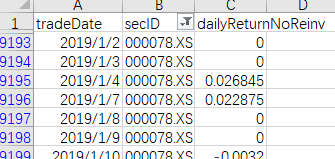